In [1]:
import pandas
from geopy.geocoders import ArcGIS
import time

In [2]:
incidentRep = pandas.read_csv("Police_Incident_Reports.csv")
incidentRep

,IncidentID,IncidentType,CaseNumber,IncidentDate,Suspect,Arrested,Address,Victim,Details,ReleasedBy,DateModified
0,8400,Robbery,2006-148788,2006-12-13T18:47:00.000Z,NaN,At Large Suspect - M/B slim to med. build wear...,1423 Troy Dr.,Tom' Shell Gas Station,Suspect displayed a black handgun and took cas...,Sgt. Chris Boyd,2009-05-11T09:33:00.000Z
1,8401,Weapons Violation,2006-149027 ...,2006-12-14T12:57:00.000Z,NaN,2 adult males ...,3100 blk Muir Field Rd ...,No person injured ...,Madison Police responded to the report of a po...,Sgt. John Patterson,NaN
2,8403,Robbery,2006-149252 ...,2006-12-14T23:53:00.000Z,NaN,"Suspect(at large)- M/W, 35-40 yoa, 6', average...",231 North St.- Milio's ...,No injuries. ...,"Suspect entered store, asked clerk for change....",Lt. Tony Bitterman,2006-12-15T03:49:00.000Z
3,8404,Non-Residential Burglary,2006-148918 ...,2006-12-14T04:21:00.000Z,NaN,n/a ...,6000 Odana Rd (Mac Store) ...,n/a ...,On 12/14/06 at approximately 4:21 Madison Poli...,PIO Michael Hanson,NaN
4,8405,Robbery,2006-149421 ...,2006-12-15T11:25:00.000Z,NaN,"Jason Riebe, 34, Madison ...",Great Midwest Saving (Odana Rd) ...,n/a ...,On 11/15/06 at approximately 11:25 a.m. the Gr...,PIO Michael Hanson,NaN
5,8406,Robbery,2006-150238 ...,2006-12-17T11:01:00.000Z,NaN,"Suspect: Black Male approx. 5'8"" average build...",West Towne Mall ...,None ...,Victim stated he was en route to a local bank ...,Sgt. John Rife,NaN
6,8407,Intoxicated Driver,2006-149802 ...,2006-12-16T09:01:00.000Z,NaN,"Kelvin Eskridge, 50, Madison: OMVWI (10th off...",600 block of W. Washington Ave ...,n/a ...,On 12/16/06 at 9:01 a.m. Madison Police Office...,PIO Michael Hanson,NaN
7,8408,Residential Burglary,2006-147496 ...,2006-12-10T07:20:00.000Z,NaN,n/a ...,100 block of W. Gilman St. ...,"Male, 22, Madison ...",On 12/10/06 at approximately 7:20 a.m. a Madis...,PIO Michael Hanson,NaN
8,8409,Battery,2006-150765 ...,2006-12-18T20:03:00.000Z,NaN,"2 black males, late teens/early 20's ...",600 block of Pine St. ...,72 year-old male ...,On 12/18/06 at approximately 8:03 p.m. Madison...,PIO Michael Hanson,NaN
9,8410,Battery,2006-149556 ...,2006-12-15T17:45:00.000Z,NaN,"3 black males, late teens ...",West Towne Mall ...,"Male, 42, Madison, transported to a hospital w...",On 12/15/06 at approximately 5:45 p.m. a Madis...,PIO Michael Hanson,NaN


In [68]:
# 2018
y2018 = incidentRep.loc[0:924, "IncidentType"]
y2018 = y2018.to_frame()
y2018

,IncidentType
0,Robbery
1,Weapons Violation
2,Robbery
3,Non-Residential Burglary
4,Robbery
5,Robbery
6,Intoxicated Driver
7,Residential Burglary
8,Battery
9,Battery


In [69]:
currRow = 0 

for i, row in incidentRep.iterrows():
    newstr = row["IncidentDate"][:4]
    if newstr == "2018":
        y2018.loc[currRow, "IncidentType"] = row["IncidentType"]
        currRow = currRow + 1
        

In [70]:
y2018

,IncidentType
0,Theft
1,Robbery
2,Drug Investigation
3,Injured Person
4,Information
5,Weapons Violation
6,Robbery
7,Robbery
8,Robbery
9,Check Person


In [71]:
# new table to group data
data = {'IncidentType': ['Robbery', 'Theft', 'Weapons Violation', 'Battery', 'Information',
                         'Non-Residential Burglary', 'Arrested Person',
                         'Accident - Injury', 'Traffic Incident', 'Sexual Assault',
                         'Drug Investigation', 'Disturbance', 'Suspicious Person', 'Fraud',
                         'Murder/Homicide', 'Residential Burglary', 'Intoxicated/Impaired Driver', 'Others'],
        'Count': [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]}
t2018 = pandas.DataFrame(data)
t2018 = t2018.set_index('IncidentType')
t2018

,Count
IncidentType,
Robbery,0
Theft,0
Weapons Violation,0
Battery,0
Information,0
Non-Residential Burglary,0
Arrested Person,0
Accident - Injury,0
Traffic Incident,0


In [72]:
for i, row in y2018.iterrows():
    currStr = row['IncidentType']
    
    if currStr == 'Robbery':
        t2018.loc['Robbery', 'Count'] = t2018.loc['Robbery', 'Count'] + 1
    elif currStr == 'Weapons Violation':
        t2018.loc['Weapons Violation', 'Count'] = t2018.loc['Weapons Violation', 'Count'] + 1
    elif currStr == 'Battery':
        t2018.loc['Battery', 'Count'] = t2018.loc['Battery', 'Count'] + 1
    elif currStr == 'Accident - Injury':
        t2018.loc['Accident - Injury', 'Count'] = t2018.loc['Accident - Injury', 'Count'] + 1
    elif currStr == 'Sexual Assault':
        t2018.loc['Sexual Assault', 'Count'] = t2018.loc['Sexual Assault', 'Count'] + 1
    elif currStr == 'Murder/Homicide':
        t2018.loc['Murder/Homicide', 'Count'] = t2018.loc['Murder/Homicide', 'Count'] + 1
    elif currStr == 'Residential Burglary':
        t2018.loc['Residential Burglary', 'Count'] = t2018.loc['Residential Burglary', 'Count'] + 1
    elif currStr == 'Intoxicated/Impaired Driver':
        t2018.loc['Intoxicated/Impaired Driver', 'Count'] = t2018.loc['Intoxicated/Impaired Driver', 'Count'] + 1
    elif currStr == 'Theft':
        t2018.loc['Theft', 'Count'] = t2018.loc['Theft', 'Count'] + 1
    elif currStr == 'Traffic Incident':
        t2018.loc['Traffic Incident', 'Count'] = t2018.loc['Traffic Incident', 'Count'] + 1
    elif currStr == 'Information':
        t2018.loc['Information', 'Count'] = t2018.loc['Information', 'Count'] + 1
    elif currStr == 'Non-Residential Burglary':
        t2018.loc['Non-Residential Burglary', 'Count'] = t2018.loc['Non-Residential Burglary', 'Count'] + 1
    elif currStr == 'Arrested Person':
        t2018.loc['Arrested Person', 'Count'] = t2018.loc['Arrested Person', 'Count'] + 1
    elif currStr == 'Disturbance':
        t2018.loc['Disturbance', 'Count'] = t2018.loc['Disturbance', 'Count'] + 1
    elif currStr == 'Drug Investigation':
        t2018.loc['Drug Investigation', 'Count'] = t2018.loc['Drug Investigation', 'Count'] + 1
    elif currStr == 'Suspicious Person':
        t2018.loc['Suspicious Person', 'Count'] = t2018.loc['Suspicious Person', 'Count'] + 1
    elif currStr == 'Fraud':
        t2018.loc['Fraud', 'Count'] = t2018.loc['Fraud', 'Count'] + 1
    else:
        t2018.loc['Others', 'Count'] = t2018.loc['Others', 'Count'] + 1
        print(currStr)
        
t2018

Injured Person
Check Person
Domestic/Family Trouble
Death Investigation
Injured Person
Death Investigation
Animal Complaint - Disturbance
Damaged Property
Injured Person
Trespassing Complaint
Traffic incident/Road Rage
Fight (In Progress)
Miscellaneous Sex Offense
Miscellaneous Sex Offense
Check Person
Attempted Homicide
Damaged Property
Domestic/Family Trouble
Death Investigation
Fight (In Progress)
Check Person
Miscellaneous Sex Offense
Domestic/Family Trouble
Attempted Homicide
Miscellaneous Sex Offense
Animal Complaint - Bite
Traffic incident/Road Rage
Threats
Attempted Homicide
Child Abuse
Traffic incident/Road Rage
Unwanted Person
Unwanted Person
Special Event
Traffic incident/Road Rage
Death Investigation
Miscellaneous Sex Offense
Damaged Property
Unwanted Person
Attempted Homicide
Death Investigation
Fight (In Progress)
Death Investigation
Damaged Property
Death Investigation
Check Person
Attempted Homicide
Damaged Property
Damaged Property
Missing Juvenile
Attempted Homicide
F

,Count
IncidentType,
Robbery,199
Theft,64
Weapons Violation,216
Battery,44
Information,24
Non-Residential Burglary,37
Arrested Person,23
Accident - Injury,0
Traffic Incident,44


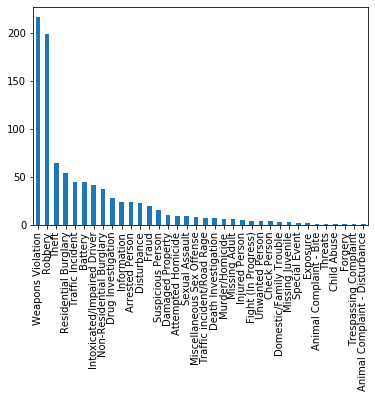

In [73]:
ax2018=y2018["IncidentType"].value_counts().plot.bar()
ax2018

In [76]:
# 2017
y2017 = incidentRep.loc[0:846, "IncidentType"]
y2017 = y2017.to_frame()
y2017

,IncidentType
0,Robbery
1,Weapons Violation
2,Robbery
3,Non-Residential Burglary
4,Robbery
5,Robbery
6,Intoxicated Driver
7,Residential Burglary
8,Battery
9,Battery


In [77]:
currRow = 0 

for i, row in incidentRep.iterrows():
    newstr = row["IncidentDate"][:4]
    if newstr == "2017":
        y2017.loc[currRow, "IncidentType"] = row["IncidentType"]
        currRow = currRow + 1
        

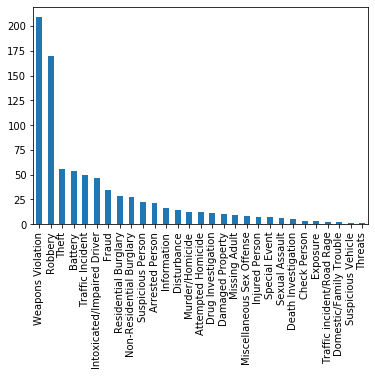

In [78]:
ax2017=y2017["IncidentType"].value_counts().plot.bar()
ax2017

In [82]:
# 2016
y2016 = incidentRep.loc[0:782, "IncidentType"]
y2016 = y2016.to_frame()
y2016

,IncidentType
0,Robbery
1,Weapons Violation
2,Robbery
3,Non-Residential Burglary
4,Robbery
5,Robbery
6,Intoxicated Driver
7,Residential Burglary
8,Battery
9,Battery


In [83]:
currRow = 0 

for i, row in incidentRep.iterrows():
    newstr = row["IncidentDate"][:4]
    if newstr == "2016":
        y2016.loc[currRow, "IncidentType"] = row["IncidentType"]
        currRow = currRow + 1
   

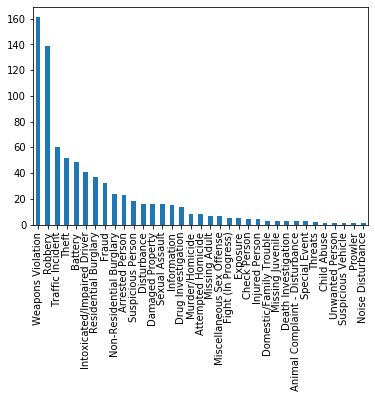

In [84]:
ax2016=y2016["IncidentType"].value_counts().plot.bar()
ax2016

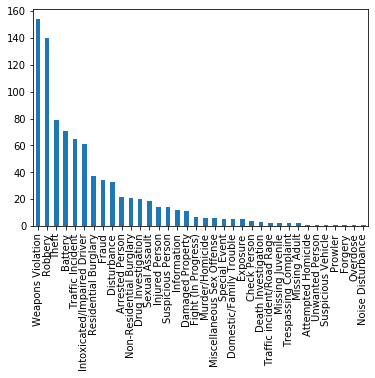

In [85]:
# 2015
y2015 = incidentRep.loc[0:862, "IncidentType"]
y2015 = y2015.to_frame()

currRow = 0 

for i, row in incidentRep.iterrows():
    newstr = row["IncidentDate"][:4]
    if newstr == "2015":
        y2015.loc[currRow, "IncidentType"] = row["IncidentType"]
        currRow = currRow + 1

ax2015=y2015["IncidentType"].value_counts().plot.bar()
ax2015

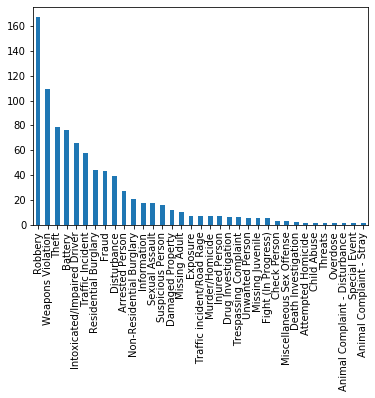

In [86]:
# 2014
y2014 = incidentRep.loc[0:870, "IncidentType"]
y2014 = y2014.to_frame()

currRow = 0 

for i, row in incidentRep.iterrows():
    newstr = row["IncidentDate"][:4]
    if newstr == "2014":
        y2014.loc[currRow, "IncidentType"] = row["IncidentType"]
        currRow = currRow + 1

ax2014=y2014["IncidentType"].value_counts().plot.bar()
ax2014

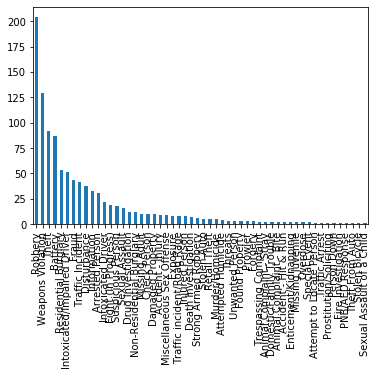

In [87]:
# 2013
y2013 = incidentRep.loc[0:1048, "IncidentType"]
y2013 = y2013.to_frame()

currRow = 0 

for i, row in incidentRep.iterrows():
    newstr = row["IncidentDate"][:4]
    if newstr == "2013":
        y2013.loc[currRow, "IncidentType"] = row["IncidentType"]
        currRow = currRow + 1

ax2013 = y2013["IncidentType"].value_counts().plot.bar()
ax2013

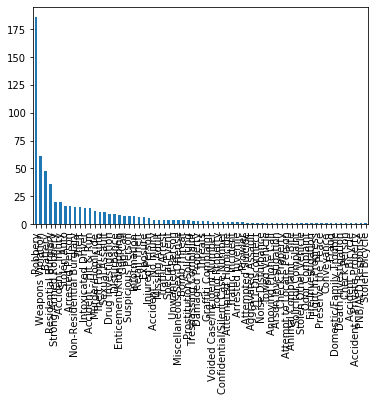

In [88]:
# 2008
y2008 = incidentRep.loc[0:641, "IncidentType"]
y2008 = y2008.to_frame()

currRow = 0 

for i, row in incidentRep.iterrows():
    newstr = row["IncidentDate"][:4]
    if newstr == "2008":
        y2008.loc[currRow, "IncidentType"] = row["IncidentType"]
        currRow = currRow + 1

ax2008 = y2008["IncidentType"].value_counts().plot.bar()
ax2008

In [23]:
# Calculate amount of weapon violation

data = [['2006', 0], ['2007', 0], ['2008', 0], ['2009', 0], ['2010', 0],
        ['2011', 0], ['2012', 0], ['2013', 0], ['2014', 0], ['2015', 0], ['2016', 0], ['2017', 0], ['2018', 0]] 
amofWeapV = pandas.DataFrame(data, columns = ['Year', 'Amount'])
amofWeapV.set_index('Year', inplace = True)
amofWeapV

,Amount
Year,
2006,0
2007,0
2008,0
2009,0
2010,0
2011,0
2012,0
2013,0
2014,0


In [24]:
for i, row in incidentRep.iterrows():
    newstr = row["IncidentDate"][:4]
    currInc = row['IncidentType']
    
    if currInc == "Weapons Violation":
        if newstr == "2006":
            amofWeapV.loc['2006', 'Amount'] += 1
        elif newstr == "2007":
            amofWeapV.loc['2007', 'Amount'] += 1
        elif newstr == "2008":
            amofWeapV.loc['2008', 'Amount'] += 1
        elif newstr == "2009":
            amofWeapV.loc['2009', 'Amount'] += 1
        elif newstr == "2010":
            amofWeapV.loc['2010', 'Amount'] += 1
        elif newstr == "2011":
            amofWeapV.loc['2011', 'Amount'] += 1
        elif newstr == "2012":
            amofWeapV.loc['2012', 'Amount'] += 1
        elif newstr == "2013":
            amofWeapV.loc['2013', 'Amount'] += 1
        elif newstr == "2014":
            amofWeapV.loc['2014', 'Amount'] += 1
        elif newstr == "2015":
            amofWeapV.loc['2015', 'Amount'] += 1
        elif newstr == "2016":
            amofWeapV.loc['2016', 'Amount'] += 1
        elif newstr == "2017":
            amofWeapV.loc['2017', 'Amount'] += 1
        elif newstr == "2018":
            amofWeapV.loc['2018', 'Amount'] += 1

In [30]:
amofWeapV

,Amount,Percentage
Year,,
2006,0,0
2007,9,1
2008,61,9
2009,95,8
2010,111,10
2011,101,9
2012,134,12
2013,129,12
2014,109,12


In [31]:
amofWeapV["Percentage"] = amofWeapV["Amount"]
for i, row in amofWeapV.iterrows():
    if i == "2006":
        row["Percentage"] = row["Amount"]/560 * 100
    elif i == "2007":
        row["Percentage"] = row["Amount"]/506 * 100
    elif i == "2008":
        row["Percentage"] = row["Amount"]/642 * 100
    elif i == "2009":
        row["Percentage"] = row["Amount"]/1087 * 100
    elif i == "2010":
        row["Percentage"] = row["Amount"]/1083 * 100
    elif i == "2011":
        row["Percentage"] = row["Amount"]/1103 * 100
    elif i == "2012":
        row["Percentage"] = row["Amount"]/1105 * 100
    elif i == "2013":
        row["Percentage"] = row["Amount"]/1049 * 100
    elif i == "2014":
        row["Percentage"] = row["Amount"]/871 * 100
    elif i == "2015":
        row["Percentage"] = row["Amount"]/863 * 100
    elif i == "2016":
        row["Percentage"] = row["Amount"]/783 * 100
    elif i == "2017":
        row["Percentage"] = row["Amount"]/847 * 100
    elif i == "2018":
        row["Percentage"] = row["Amount"]/925 * 100
        
amofWeapV

,Amount,Percentage
Year,,
2006,0,0
2007,9,1
2008,61,9
2009,95,8
2010,111,10
2011,101,9
2012,134,12
2013,129,12
2014,109,12


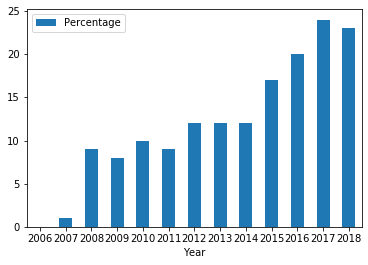

In [32]:
axamofWeapV = amofWeapV.plot.bar(y='Percentage', rot = 0)
axamofWeapV

In [33]:
# Calculating robbery
amofRob = pandas.DataFrame(data, columns = ['Year', 'Amount'])
amofRob.set_index('Year', inplace = True)
amofRob

,Amount
Year,
2006,0
2007,0
2008,0
2009,0
2010,0
2011,0
2012,0
2013,0
2014,0


In [34]:
for i, row in incidentRep.iterrows():
    newstr = row["IncidentDate"][:4]
    currInc = row['IncidentType']
    
    if currInc == "Robbery":
        if newstr == "2006":
            amofRob.loc['2006', 'Amount'] += 1
        elif newstr == "2007":
            amofRob.loc['2007', 'Amount'] += 1
        elif newstr == "2008":
            amofRob.loc['2008', 'Amount'] += 1
        elif newstr == "2009":
            amofRob.loc['2009', 'Amount'] += 1
        elif newstr == "2010":
            amofRob.loc['2010', 'Amount'] += 1
        elif newstr == "2011":
            amofRob.loc['2011', 'Amount'] += 1
        elif newstr == "2012":
            amofRob.loc['2012', 'Amount'] += 1
        elif newstr == "2013":
            amofRob.loc['2013', 'Amount'] += 1
        elif newstr == "2014":
            amofRob.loc['2014', 'Amount'] += 1
        elif newstr == "2015":
            amofRob.loc['2015', 'Amount'] += 1
        elif newstr == "2016":
            amofRob.loc['2016', 'Amount'] += 1
        elif newstr == "2017":
            amofRob.loc['2017', 'Amount'] += 1
        elif newstr == "2018":
            amofRob.loc['2018', 'Amount'] += 1

In [35]:
amofRob

,Amount
Year,
2006,1
2007,28
2008,186
2009,269
2010,239
2011,180
2012,161
2013,204
2014,167


In [36]:
amofRob["Percentage"] = amofRob["Amount"]
for i, row in amofRob.iterrows():
    if i == "2006":
        row["Percentage"] = row["Amount"]/560 * 100
    elif i == "2007":
        row["Percentage"] = row["Amount"]/506 * 100
    elif i == "2008":
        row["Percentage"] = row["Amount"]/642 * 100
    elif i == "2009":
        row["Percentage"] = row["Amount"]/1087 * 100
    elif i == "2010":
        row["Percentage"] = row["Amount"]/1083 * 100
    elif i == "2011":
        row["Percentage"] = row["Amount"]/1103 * 100
    elif i == "2012":
        row["Percentage"] = row["Amount"]/1105 * 100
    elif i == "2013":
        row["Percentage"] = row["Amount"]/1049 * 100
    elif i == "2014":
        row["Percentage"] = row["Amount"]/871 * 100
    elif i == "2015":
        row["Percentage"] = row["Amount"]/863 * 100
    elif i == "2016":
        row["Percentage"] = row["Amount"]/783 * 100
    elif i == "2017":
        row["Percentage"] = row["Amount"]/847 * 100
    elif i == "2018":
        row["Percentage"] = row["Amount"]/925 * 100
        
amofRob

,Amount,Percentage
Year,,
2006,1,0
2007,28,5
2008,186,28
2009,269,24
2010,239,22
2011,180,16
2012,161,14
2013,204,19
2014,167,19


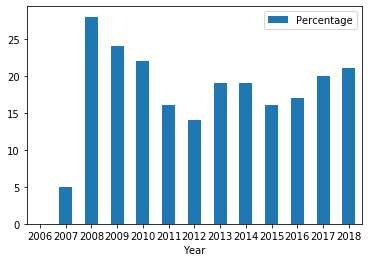

In [38]:
axamofRob = amofRob.plot.bar(y='Percentage', rot = 0)
axamofRob